In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### get_dummies review

In [4]:
three_features = ['total_bill', 'size', 'day']
three_feature_data = pd.DataFrame(tips[three_features])
dummies = pd.get_dummies(three_feature_data['day'])
tips_w_dummies = pd.concat([three_feature_data, dummies], axis=1)

tips_w_dummies.iloc[[193, 90, 25, 26, 190], :]

,total_bill,size,day,Thur,Fri,Sat,Sun
193,15.48,2,Thur,1,0,0,0
90,28.97,2,Fri,0,1,0,0
25,17.81,4,Sat,0,0,1,0
26,13.37,2,Sat,0,0,1,0
190,15.69,2,Sun,0,0,0,1


#### Using Text Features

#### Letter Count Vectorizer

In [4]:
class LetterCountVectorizer():

    def transform(self, texts):
        all_text_phi = []
        for text in texts:
            text = text.lower()
            this_text_phi = np.array([0] * 26)
            for i, L in enumerate('abcdefghijklmnopqrstuvwxyz'):
                this_text_phi[i] = text.count(L)
            all_text_phi.append(this_text_phi)

        return np.array(all_text_phi)

In [5]:
lcv = LetterCountVectorizer()
example_phi = lcv.transform(
    ["aaabc", "To help his memory I mentioned my name."])
example_phi

array([[3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 1, 5, 0, 0, 2, 3, 0, 0, 1, 5, 3, 3, 1, 0, 1, 1, 2, 0, 0,
        0, 0, 2, 0]])

#### Applying the LetterCountVectorizer to Real Data

In [6]:
np.random.seed(23)

In [7]:
f = open(r"data_set\mobydick.txt", "r")
mobydick = f.read()
f.close()

In [8]:
mobydick[0:100]

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my pur'

In [9]:
mobydick_crude_lines = mobydick.split('.')

In [10]:
len(mobydick_crude_lines)

7250

In [11]:
mobydick_crude_lines[0:5]

['Call me Ishmael',
 '  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world',
 '  It is a way I have of\ndriving off the spleen and regulating the circulation',
 "  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople's hats off--then, I account it high time to get to sea as soon\nas I can",
 '  This is my substitute for pistol and ball']

In [12]:
mobydick_train, mobydick_test = np.split(mobydick_crude_lines, [6000])

To use our letter count vectorizer for classification, we'll need to create a dataset. Let's use "Great Expectations" as our second book. Lines from "Moby Dick" will be class 0, and lines from "Great Expectations will be class 1. 

In [13]:
f = open(r"data_set\great_expectations.txt", "r", encoding='utf-8')
ge = f.read()
f.close()

In [14]:
ge_crude_lines = ge.split('.')

In [15]:
len(ge_crude_lines)

6634

In [16]:
ge_train, ge_test = np.split(ge_crude_lines, [5000])

First we combine both books into one big array:

In [17]:
both_books_train = np.concatenate([mobydick_train, ge_train])

Then we create `y`, which has the class for each sentence.

In [18]:
y_train = np.concatenate(
    [np.zeros(len(mobydick_train)),
     np.ones(len(ge_train))])

For example, line #3756 is from Moby Dick (class 0).

In [19]:
both_books_train[3756]

'\n\n\nA word concerning an incident in the last chapter'

In [20]:
y_train[3756]

0.0

#### Training and Evaluating Models

To create a Logistic Regression model, we simply vectorize our books, then fit a model as usual.

In [21]:
phi_both_books_train = lcv.transform(both_books_train)

In [22]:
phi_both_books_train[10998]

array([2, 0, 3, 2, 4, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 3, 1, 2, 1, 0,
       0, 0, 0, 0])

For example, line 3756 is turned into the letter count vector below:

In [23]:
phi_both_books_train[3756]

array([4, 0, 4, 2, 4, 0, 1, 2, 4, 0, 0, 1, 0, 7, 2, 1, 0, 3, 1, 4, 0, 0,
       1, 0, 0, 0])

In [24]:
phi_both_books_train.shape

(11000, 26)

In [25]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(max_iter=10000)
lm.fit(phi_both_books_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can now use this model as usual:

In [26]:
lm_predictions_train = lm.predict(phi_both_books_train)
lm_predictions_train

array([0., 0., 1., ..., 1., 1., 0.])

For example, the model predicts that line 0 is from Moby Dick.

In [27]:
both_books_train[0]

'Call me Ishmael'

In [28]:
lm_predictions_train[0]

0.0

In [29]:
y_train[0]

0.0

In [30]:
lm_predictions_train[10999]

0.0

In [31]:
y_train[10999]

1.0

It does this by computing the product of the vectorized sentence with the coefficients:

In [32]:
lcv.transform([both_books_train[3756]])[0]

array([4, 0, 4, 2, 4, 0, 1, 2, 4, 0, 0, 1, 0, 7, 2, 1, 0, 3, 1, 4, 0, 0,
       1, 0, 0, 0])

In [33]:
lm.intercept_

array([0.33215655])

In [34]:
np.sum(lcv.transform([both_books_train[3756]])[0] * lm.coef_[0]) + lm.intercept_

array([-0.05204517])

In [35]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [36]:
sigma(-0.05174086)

0.4870676699842183

The probability above is, of course, the same that we get from `predict_proba`.

In [37]:
lm.predict_proba(lcv.transform([both_books_train[3756]]))

array([[0.51300836, 0.48699164]])

Overall, the training accuracy is seemingly OK, but not great, at around 70%.

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, lm_predictions_train)

0.6993636363636364

We can also look at the confusion matrix:

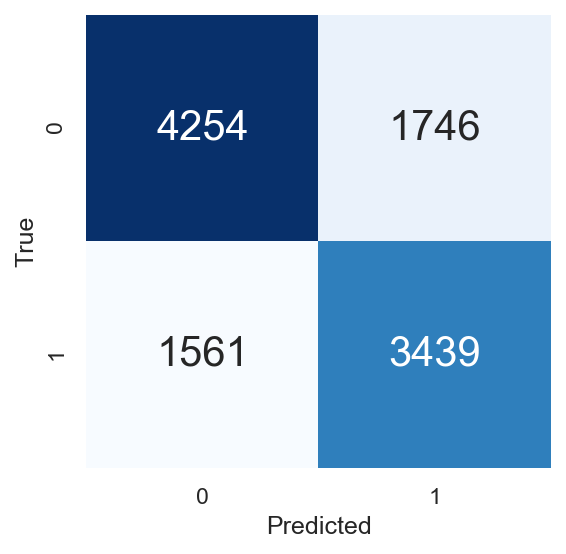

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, lm_predictions_train)
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            annot_kws={"size": 20},
            cbar=False)
plt.ylabel('True')
plt.xlabel('Predicted')
sns.set(font_scale=2)

Below, we compute the test accuracy and see it is about the same, at 70%.

In [40]:
both_books_test = np.concatenate([mobydick_test, ge_test])
y_test = np.concatenate([np.zeros(len(mobydick_test)), np.ones(len(ge_test))])
phi_both_books_test = lcv.transform(both_books_test)
lm_predictions_test = lm.predict(phi_both_books_test)
accuracy_score(y_test, lm_predictions_test)

0.6952149791955617

To get a visual picture of how such models, let's try fitting a decision tree with a really high min $\Delta WG$.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_impurity_decrease=0.003)
dt.fit(phi_both_books_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.003, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
accuracy_score(y_train, dt.predict(phi_both_books_train))

0.637

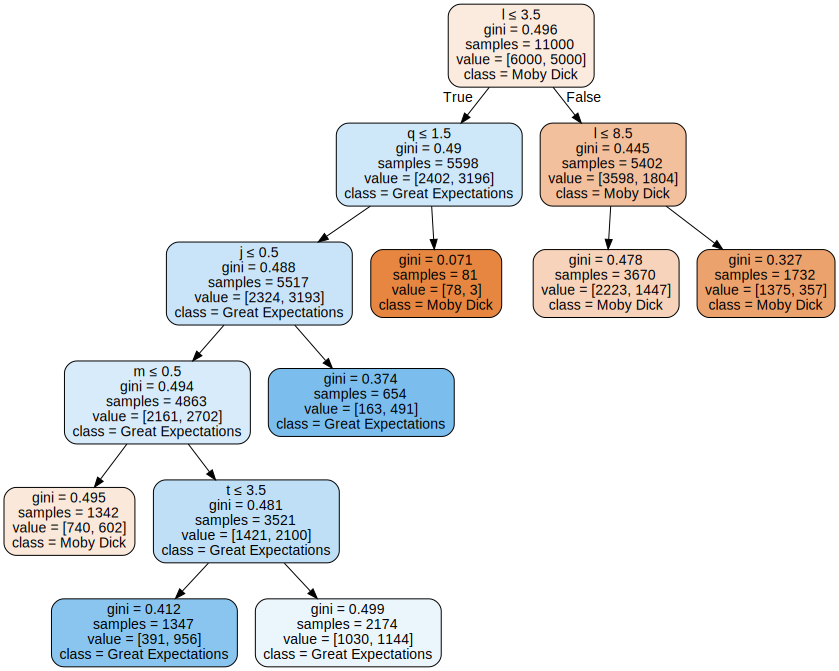

In [44]:
import sklearn.tree
import graphviz
dot_data = sklearn.tree.export_graphviz(
    dt,
    out_file=None,
    feature_names="abcdefghijklmnopqrstuvwxyz",
    class_names=["Moby Dick", "Great Expectations"],
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

#### Now in Chinese

Suppose we try to do the same thing with Chinese language texts, e.g. 三國演義 

In [47]:
f = open(r"data_set\三國演義.txt", 'r', encoding='utf-8')
three_kingdoms = f.read()
f.close()

In [48]:
three_kingdoms_lines = three_kingdoms.split('\n')
three_kingdoms_lines[0:5]

['第一回：宴桃園豪傑三結義，斬黃巾英雄首立功',
 '',
 '\u3000\u3000詞曰：',
 '',
 '\u3000\u3000滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白']

In principle, we could do the exact same thing as before, and create a giant list of features. Every Chinese character has a corresponding unicode number, e.g.

In [49]:
print(chr(20660))

傴


In [50]:
print(ord('滾'))

28414


One way we can be a bit more efficient is to first "fit" our vectorizer. That is, we can identify all of the characters in our training set that are actually used and only count those letters.

In [51]:
class ChineseCharacterVectorizer():

    def __init__(self):
        self.vocabulary_ = {}

    def fit(self, texts):
        self.vocabulary_ = {}
        i = 0
        for text in texts:
            for c in text:
                if c not in self.vocabulary_:
                    self.vocabulary_[c] = i
                    i += 1

    def transform(self, texts):
        all_text_phi = []
        for text in texts:
            text = text.lower()
            this_text_phi = np.array([0] * len(self.vocabulary_))
            for c in text:
                index = self.vocabulary_.get(c, None)
                if index is not None:
                    this_text_phi[index] += 1
            all_text_phi.append(this_text_phi)

        return np.array(all_text_phi)

In [52]:
ccv = ChineseCharacterVectorizer()
ccv.fit([
    '第一回：宴桃園豪傑三結義，斬黃巾英雄首立功', '\u3000\u3000滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白'
])
ccv.vocabulary_

{'第': 0,
 '一': 1,
 '回': 2,
 '：': 3,
 '宴': 4,
 '桃': 5,
 '園': 6,
 '豪': 7,
 '傑': 8,
 '三': 9,
 '結': 10,
 '義': 11,
 '，': 12,
 '斬': 13,
 '黃': 14,
 '巾': 15,
 '英': 16,
 '雄': 17,
 '首': 18,
 '立': 19,
 '功': 20,
 '\u3000': 21,
 '滾': 22,
 '長': 23,
 '江': 24,
 '東': 25,
 '逝': 26,
 '水': 27,
 '浪': 28,
 '花': 29,
 '淘': 30,
 '盡': 31,
 '。': 32,
 '是': 33,
 '非': 34,
 '成': 35,
 '敗': 36,
 '轉': 37,
 '頭': 38,
 '空': 39,
 '青': 40,
 '山': 41,
 '依': 42,
 '舊': 43,
 '在': 44,
 '幾': 45,
 '度': 46,
 '夕': 47,
 '陽': 48,
 '紅': 49,
 '白': 50}

In [53]:
ccv.transform([
    '第一回：宴桃園豪傑三結義，斬黃巾英雄首立功', '\u3000\u3000滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白',
    '网易云课堂，是网易公司打造的在线实用技能学习平台，该平台于2012年12月底正式上线，'
])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0]])

#### Words

In [54]:
np.random.seed(23)

Intuitively, it feels like words might be a better way to predict sentences than letters. For example, the word "whale" is probably much more likely to appear in a line from Moby Dick than a line from Great Expectations.

We can do roughly the same thing as we did for Chinese characters, namely:
1. Fit the vectorizer by assigning a number to every observed word.
2. Count the number of each word.

Luckily, this already exists in sklearn as `sklearn.feature_extraction.text.CountVectorizer`.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

wcv = CountVectorizer()
wcv.fit(both_books_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

First we train the word count vectorizer, as shown above. Below, we can see the number corresponding to each word, e.g. "call" is assigned the number 2385. In other words $\phi_{2385}$ will be count of the word "call".

Note: If you're running this notebook yourself, you might end up with different numbers than I did on my computer.

In [63]:
wcv.vocabulary_

{'call': 2385,
 'me': 10143,
 'ishmael': 8908,
 'some': 15000,
 'years': 18443,
 'ago': 499,
 'never': 10854,
 'mind': 10346,
 'how': 8014,
 'long': 9723,
 'precisely': 12357,
 'having': 7618,
 'little': 9644,
 'or': 11235,
 'no': 10896,
 'money': 10486,
 'in': 8335,
 'my': 10707,
 'purse': 12777,
 'and': 721,
 'nothing': 10963,
 'particular': 11571,
 'to': 16531,
 'interest': 8732,
 'on': 11180,
 'shore': 14482,
 'thought': 16373,
 'would': 18342,
 'sail': 13870,
 'about': 198,
 'see': 14185,
 'the': 16292,
 'watery': 17914,
 'part': 11558,
 'of': 11123,
 'world': 18320,
 'it': 8929,
 'is': 8904,
 'way': 17928,
 'have': 7615,
 'driving': 5111,
 'off': 11124,
 'spleen': 15201,
 'regulating': 13205,
 'circulation': 2890,
 'whenever': 18052,
 'find': 6316,
 'myself': 10710,
 'growing': 7352,
 'grim': 7305,
 'mouth': 10602,
 'damp': 4124,
 'drizzly': 5112,
 'november': 10983,
 'soul': 15042,
 'involuntarily': 8860,
 'pausing': 11653,
 'before': 1531,
 'coffin': 3119,
 'warehouses': 17859,

In [64]:
len(wcv.vocabulary_)

18499

Note that there are many words here that probably aren't very useful. For example, the number of times that "the" appears in a sentence is probably not useful for classification. Useless words like these are called "stop words", and we can avoid counting them by setting `stop_words = "english"`, as shown below: 

In [65]:
wcv = CountVectorizer(stop_words="english")
wcv.fit(both_books_train)
wcv.vocabulary_

{'ishmael': 8777,
 'years': 18149,
 'ago': 492,
 'mind': 10200,
 'long': 9584,
 'precisely': 12165,
 'having': 7509,
 'little': 9505,
 'money': 10339,
 'purse': 12585,
 'particular': 11382,
 'shore': 14278,
 'thought': 16129,
 'sail': 13675,
 'watery': 17649,
 'world': 18027,
 'way': 17663,
 'driving': 5043,
 'spleen': 14984,
 'regulating': 13010,
 'circulation': 2832,
 'growing': 7246,
 'grim': 7199,
 'mouth': 10451,
 'damp': 4062,
 'drizzly': 5044,
 'november': 10814,
 'soul': 14825,
 'involuntarily': 8730,
 'pausing': 11464,
 'coffin': 3060,
 'warehouses': 17595,
 'bringing': 2096,
 'rear': 12843,
 'funeral': 6720,
 'meet': 10054,
 'especially': 5609,
 'hypos': 8001,
 'upper': 17174,
 'hand': 7375,
 'requires': 13207,
 'strong': 15397,
 'moral': 10384,
 'principle': 12297,
 'prevent': 12268,
 'deliberately': 4268,
 'stepping': 15222,
 'street': 15356,
 'methodically': 10136,
 'knocking': 9088,
 'people': 11564,
 'hats': 7495,
 'account': 256,
 'high': 7685,
 'time': 16241,
 'sea': 1

From below, we can see that there 18,199 unique words that occur in our books. Thus, every line of each book is turned into a vector with 18,199 features (wow!).

In [67]:
len(wcv.vocabulary_)

18199

Now that we have a vectorizer, we can use it to transform each line of our books into 18,199 features:

In [68]:
phi_both_books_train = wcv.transform(both_books_train)

For example, we can see that line 70 in English is "Whaling voyage by one ishmael".

In [69]:
both_books_train[70]

'\n"WHALING VOYAGE BY ONE ISHMAEL'

Let's try to look at the features that represent this sentence:

In [70]:
phi_both_books_train[70]

<1x18199 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

Because almost all of the entries are zero in any given $\phi$, you'll see they are stored ina  special format called a "sparse matrix." We note that it says there are "3 stored elements". What it means by this is that only 3 of the features are non-zero.

We won't talk about the details of sparse matrices in our class, but the basic idea is that rather than many thousands of zeros and only 3 ones, the data is stored in a special format. To see which 3 entries are not zero, we can use the `nonzero` function:

In [71]:
phi_both_books_train[70].nonzero()

(array([0, 0, 0]), array([ 8777, 17490, 17763]))

This says that this sentence contains 3 non-stop words, namely words 8777, 17490, and 17763. To see which words, these are, we can use our vocabulary:

In [84]:
for word, number in wcv.vocabulary_.items():
    if number in {0, 1, 3, 5, 7, 9, 11, 8777, 17490, 17763}:
        print(f"{word}: {number}")

ishmael: 8777
voyage: 17490
whaling: 17763
10: 9
000: 0
101: 11
0037m: 1
0082m: 3
0189m: 5
0242m: 7


From this, we see ishmael is "8777", whaling is word 17763, and voyage is word 17490. Apparently, this word count vectorizer considers "by" and "one" to be stop words.

When we represent text as word counts, this is known as a **bag of words** model.

Luckily, our logistic regression implementation (and all other sklearn classifiers) is able to handle a bag of words represented by sparse matrices. That is, we can train our LogisticRegression model just like normal.

In [85]:
lm.coef_.shape

(1, 26)

In [86]:
lm = LogisticRegression()
lm.fit(phi_both_books_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

To use this classifer on new inputs, we need to first transform the inputs using the word count vectorizer. For example, consider the three sentences below:
1. "The whale on the moon had his Weibo account suspended",
2. "The widow and the orphan slept at the Blacksmith's shop",
3. "To use this classifer, we need to first transform our sentences using the word count vectorizer"

Our model will tell us the likelihood that each of these three sentences would appear in Great Expectations vs. Moby Dick.

According to the code below, these sentence are:
1. 98% likely to occur in Moby Dick (rather than Great Expectations)
2. 84% likely to occur in Great Expectations (rather than Moby Dick)
3. 68% likely to occur in Moby Dick (rather than Great Expectations)

In [87]:
phi_example = wcv.transform([
    "The whale on the moon had his Weibo account suspended",
    "The widow and the orphan slept at the Blacksmith's shop",
    "To use this classifer, we need to first transform our sentences using the word count vectorizer",
])
lm.predict_proba(phi_example)

array([[0.98126485, 0.01873515],
       [0.16333259, 0.83666741],
       [0.67762886, 0.32237114]])

We can compute our overall training and test accuracy:

In [88]:
lm_predictions_train = lm.predict(phi_both_books_train)
accuracy_score(y_train, lm_predictions_train)

0.9755454545454545

In [89]:
phi_both_books_test = wcv.transform(both_books_test)
lm_predictions_test = lm.predict(phi_both_books_test)
accuracy_score(y_test, lm_predictions_test)

0.8661581137309292

We see that we get 95% and 86% accuracy on the training and test set respectively, which is much better than the 69% we got by doing letter counts.

To see which features are most important, we can look at the coefficients of our logistic regression model:

In [90]:
lm.coef_

array([[-8.36002633e-01,  2.42777617e-02,  8.24104925e-04, ...,
        -2.57382651e-02, -5.97829620e-02, -3.05046118e-02]])

In [92]:
len(lm.coef_[0])

18199

Using argsort, we can get the 5 most important features.

In [94]:
np.argsort(abs(lm.coef_))[0][-10:]

array([  509,  2423, 12542, 18145, 18012,  8819, 15413, 17748,  8892,
       12648], dtype=int64)

These coefficients have the values shown below:

In [96]:
lm.coef_[0, [509, 2423, 12542, 18145, 18012, 8819, 15413, 17748, 8892, 12648]]

array([-2.55989429, -2.64155873,  2.66757231, -2.75761556,  2.98754163,
        3.11750807, -3.15503924, -3.48784038,  3.64688072, -3.82231036])

In [70]:
np.array([3.12, -3.16, -3.49, 3.65, -3.82])

array([ 3.12, -3.16, -3.49,  3.65, -3.82])

And correspond to the words shown below:

In [97]:
for number in [509, 2423, 12542, 18145, 18012, 8819, 15413, 17748, 8892, 12648]:
    for word, n2 in wcv.vocabulary_.items():
        if number == n2:
            print(f"{word}: {number}")

ahab: 509
captain: 2423
pumblechook: 12542
ye: 18145
wopsle: 18012
jaggers: 8819
stubb: 15413
whale: 17748
joe: 8892
queequeg: 12648


In [98]:
lm.intercept_

array([-0.14744307])

In [99]:
lm.predict_proba(wcv.transform(["jaggers is a whale"]))

array([[0.62662743, 0.37337257]])

#### Decision Tree Example

We can of course build a decision tree as well using our word counts.

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_impurity_decrease=0.02)
dt.fit(phi_both_books_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
wcv.vocabulary_

{'ishmael': 8777,
 'years': 18149,
 'ago': 492,
 'mind': 10200,
 'long': 9584,
 'precisely': 12165,
 'having': 7509,
 'little': 9505,
 'money': 10339,
 'purse': 12585,
 'particular': 11382,
 'shore': 14278,
 'thought': 16129,
 'sail': 13675,
 'watery': 17649,
 'world': 18027,
 'way': 17663,
 'driving': 5043,
 'spleen': 14984,
 'regulating': 13010,
 'circulation': 2832,
 'growing': 7246,
 'grim': 7199,
 'mouth': 10451,
 'damp': 4062,
 'drizzly': 5044,
 'november': 10814,
 'soul': 14825,
 'involuntarily': 8730,
 'pausing': 11464,
 'coffin': 3060,
 'warehouses': 17595,
 'bringing': 2096,
 'rear': 12843,
 'funeral': 6720,
 'meet': 10054,
 'especially': 5609,
 'hypos': 8001,
 'upper': 17174,
 'hand': 7375,
 'requires': 13207,
 'strong': 15397,
 'moral': 10384,
 'principle': 12297,
 'prevent': 12268,
 'deliberately': 4268,
 'stepping': 15222,
 'street': 15356,
 'methodically': 10136,
 'knocking': 9088,
 'people': 11564,
 'hats': 7495,
 'account': 256,
 'high': 7685,
 'time': 16241,
 'sea': 1

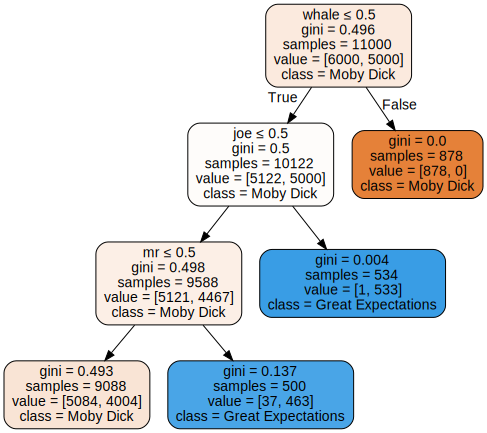

In [103]:
dot_data = sklearn.tree.export_graphviz(
    dt,
    out_file=None,
    feature_names=list(sorted(wcv.vocabulary_.keys())),
    class_names=["Moby Dick", "Great Expectations"],
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

Note that the most important features to the decision tree are not the same as the logistic regression model. Here the words of greatest interest are "whale", "joe", and "mr". whale is a word that only occurs in Great Expectations. joe is a word that occurs almost exclusively in Great Expectations, and "mr" is a word that occurs almost exclusively in Great Expectations (463/500 times). 

The tree above has 63% percent training accuracy and 46% percent test accuracy. This is pretty terrible! The model actually does worse than random guessing on the unseen test set.

In [104]:
dt_predictions_train = dt.predict(phi_both_books_train)
dt_predictions_test = dt.predict(phi_both_books_test)
print(f"Train Accuracy: {accuracy_score(y_train, dt_predictions_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_predictions_test)}")

Train Accuracy: 0.6325454545454545
Test Accuracy: 0.46879334257975036


Above, we set a very high bar for our min $\Delta WG$. If we remove that restriction, we'll get a much more complex tree not shown. This tree has 98% training accuracy and 80% test accuracy. The very high training accuracy is unsurprising since a decision tree will get 100% so long as there are no overlappnig points. The test accuracy is somewhat lower than our unregularized logistic regression model above.

In [105]:
dt = DecisionTreeClassifier()
dt.fit(phi_both_books_train, y_train)
dt_predictions_train = dt.predict(phi_both_books_train)
dt_predictions_test = dt.predict(phi_both_books_test)
print(f"Train Accuracy: {accuracy_score(y_train, dt_predictions_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_predictions_test)}")

Train Accuracy: 0.9948181818181818
Test Accuracy: 0.8020110957004161


In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_impurity_decrease': np.linspace(0, 0.001, 20)}

dt_model_finder = GridSearchCV(DecisionTreeClassifier(),
                               parameters,
                               n_jobs=-1,
                               cv=10)
dt_model_finder.fit(phi_both_books_train, y_train)
dt_model_finder.best_score_

0.8038181818181818

In [107]:
dt_model_finder.best_params_

{'min_impurity_decrease': 0.00010526315789473685}

In [111]:
dt_predictions_train = dt_model_finder.best_estimator_.predict(
    phi_both_books_train)
dt_predictions_test = dt_model_finder.best_estimator_.predict(
    phi_both_books_test)
print(f"Train Accuracy: {accuracy_score(y_train, dt_predictions_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_predictions_test)}")

Train Accuracy: 0.9656363636363636
Test Accuracy: 0.800624133148405


Given that our most "powerful" technique is the random forest, let's see how good we can do on accuracy if we train a random forest model. Since we are just going for maximum accuracy, let's also perform a Grid Search. If you uncomment and run, it will take a very long time (perhaps more than an hour) to complete training.

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'min_impurity_decrease': [0, 0.01, 0.05],
    "max_leaf_nodes": [3, 5, 10, None],
    "max_features": ["auto", "sqrt", "log2"]
}

rf_model_finder = GridSearchCV(RandomForestClassifier(),
                               parameters,
                               n_jobs=-1,
                               cv=10)
rf_model_finder.fit(phi_both_books_train, y_train)
rf_model_finder.best_score_

0.8563636363636364

In [113]:
rf_model_finder.best_params_

{'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0}

In [115]:
rf_model_finder.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Above, we see that the cross validation score for our best random forest estimator was 85%.n_jobs=

In [116]:
rf = rf_model_finder.best_estimator_
rf_predictions_train = rf.predict(phi_both_books_train)
rf_predictions_test = rf.predict(phi_both_books_test)
print(f"Train Accuracy: {accuracy_score(y_train, rf_predictions_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, rf_predictions_test)}")

Train Accuracy: 0.9948181818181818
Test Accuracy: 0.875866851595007


Our overall training and test accuracy is 98% and 86% on the training and test set. It seems our random forest does about as well as our unregularized logistic regression model on unseen data.

Quick note before we continue: CountVectorizer assumes there are spaces between words, which works well with lots of western languages. However, to do word counts in Chinese, Japanese, etc. you'll need to use a special library.

For Chinese, I recommend `jieba`: https://github.com/fxsjy/jieba

#### 2-Grams

In [117]:
wcv2 = CountVectorizer(stop_words="english", ngram_range=(2, 2))
wcv2.fit(["Cows like to drive orange cars.", "The fish eats organic kale."])
wcv2.vocabulary_

{'cows like': 0,
 'like drive': 4,
 'drive orange': 1,
 'orange cars': 5,
 'fish eats': 3,
 'eats organic': 2,
 'organic kale': 6}

In [118]:
wcv2 = CountVectorizer(stop_words="english", ngram_range=(2, 4))
wcv2.fit(["Cows like to drive orange cars.", "The fish eats organic kale."])
wcv2.vocabulary_

{'cows like': 0,
 'like drive': 10,
 'drive orange': 3,
 'orange cars': 13,
 'cows like drive': 1,
 'like drive orange': 11,
 'drive orange cars': 4,
 'cows like drive orange': 2,
 'like drive orange cars': 12,
 'fish eats': 7,
 'eats organic': 5,
 'organic kale': 14,
 'fish eats organic': 8,
 'eats organic kale': 6,
 'fish eats organic kale': 9}

#### Images

In [119]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [120]:
X.shape

(70000, 784)

In [121]:
y[50]

'3'

In [122]:
X[50]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  12.,  56., 140., 126., 175., 200.,  96.,   2.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  35., 166., 23

In [123]:
len(X[50])

784

In [124]:
X[50].reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,
         56., 140., 126., 175., 200.,  96.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

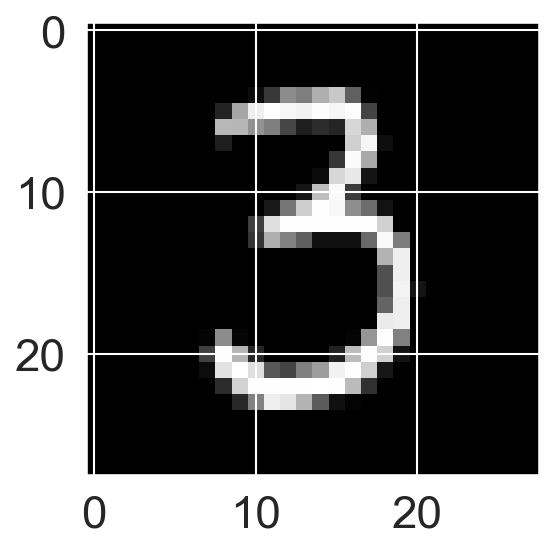

In [126]:
plt.imshow(X[50].reshape(28, 28), cmap='gray')

In [127]:
y[50]

'3'

In [128]:
def homemade_image_features(x):
    phi1 = np.count_nonzero(x == 0)
    phi2 = np.count_nonzero(x < 64)
    phi3 = np.count_nonzero((x < 128) & (x > 64))
    phi4 = np.count_nonzero((x < 192) & (x > 128))
    phi5 = np.count_nonzero(x > 192)
    return np.array([phi1, phi2, phi3, phi4, phi5])

In [130]:
homemade_image_features(X[50])

array([656, 692,  16,  22,  52])

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [132]:
homemade_phi_train = np.apply_along_axis(homemade_image_features, 1, X_train)
homemade_phi_test = np.apply_along_axis(homemade_image_features, 1, X_test)

In [133]:
homemade_phi_train

array([[602, 636,  17,  18, 112],
       [649, 680,  14,  20,  67],
       [613, 654,  26,  18,  84],
       ...,
       [707, 723,   6,  17,  37],
       [598, 624,  31,  15, 113],
       [566, 600,  35,  18, 129]])

In [134]:
lm = LogisticRegression(max_iter=10000)
lm.fit(homemade_phi_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
lm_predictions_train_homemade = lm.predict(homemade_phi_train)
lm_predictions_test_homemade = lm.predict(homemade_phi_test)
print(
    f"Training Accuracy: {accuracy_score(y_train, lm_predictions_train_homemade)}"
)
print(f"Test Accuracy: {accuracy_score(y_test, lm_predictions_test_homemade)}")

Training Accuracy: 0.2779317697228145
Test Accuracy: 0.2777922077922078


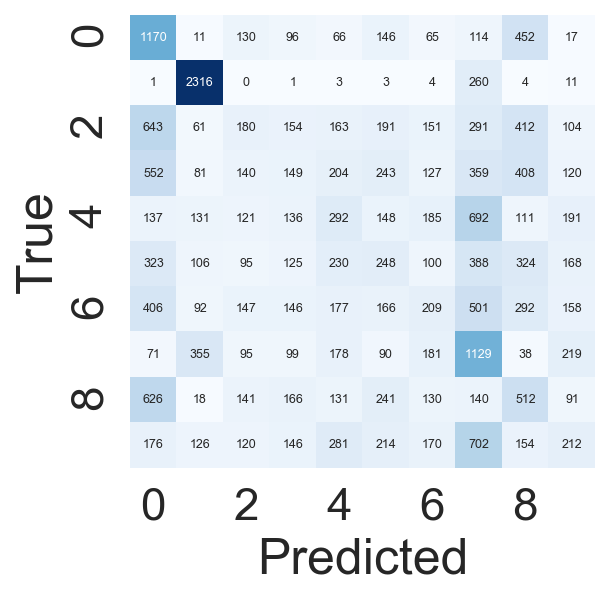

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lm_predictions_test_homemade)
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            annot_kws={"size": 6},
            cbar=False)
plt.ylabel('True')
plt.xlabel('Predicted')
sns.set(font_scale=1)

### Better Feature Set: The Raw Data

In [140]:
lm = LogisticRegression(max_iter=10000)
lm.fit(X_train, y_train)

D:\Programing\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
lm_predictions_train_raw = lm.predict(X_train)
lm_predictions_test_raw = lm.predict(X_test)
print(f"Training Accuracy: {accuracy_score(y_train, lm_predictions_train_raw)}")
print(f"Test Accuracy: {accuracy_score(y_test, lm_predictions_test_raw)}")

Training Accuracy: 0.9501705756929637
Test Accuracy: 0.9081818181818182


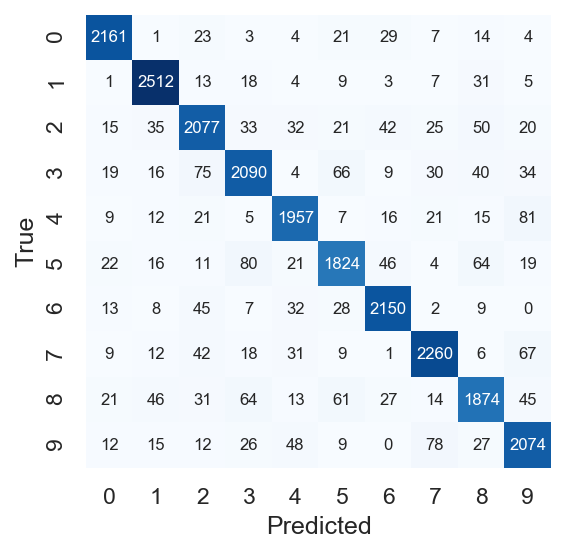

In [151]:
cm = confusion_matrix(y_test, lm_predictions_test_raw)
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            annot_kws={"size": 8},
            cbar=False)
plt.ylabel('True')
plt.xlabel('Predicted')
sns.set(font_scale=1)
plt.savefig("raw_data_cmatrix.png", dpi=300, bbox_inches="tight")

#### Even Better: Histogram of Gradients

In [143]:
from skimage.feature import hog


def hogify(X):
    return hog(X.reshape(28, 28),
               orientations=8,
               pixels_per_cell=(4, 4),
               cells_per_block=(1, 1),
               feature_vector=True)

In [144]:
X_train_hog = np.apply_along_axis(hogify, 1, X_train)

In [145]:
X_test_hog = np.apply_along_axis(hogify, 1, X_test)

In [146]:
X_train_hog.shape

(46900, 392)

In [147]:
lm = LogisticRegression()
lm.fit(X_train_hog, y_train)

D:\Programing\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
lm_predictions_train_hog = lm.predict(X_train_hog)
lm_predictions_test_hog = lm.predict(X_test_hog)
print(f"Training Accuracy: {accuracy_score(y_train, lm_predictions_train_hog)}")
print(f"Test Accuracy: {accuracy_score(y_test, lm_predictions_test_hog)}")

Training Accuracy: 0.9853091684434968
Test Accuracy: 0.9708225108225108


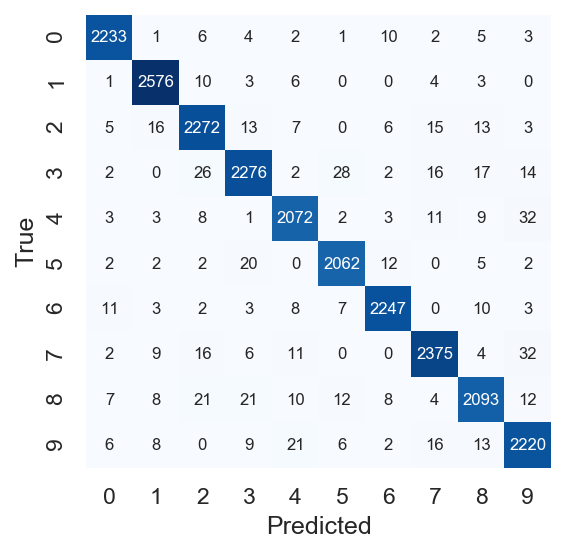

In [150]:
cm = confusion_matrix(y_test, lm_predictions_test_hog)
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            annot_kws={"size": 8},
            cbar=False)
plt.ylabel('True')
plt.xlabel('Predicted')
sns.set(font_scale=1)
plt.savefig("hog_model_cmatrix.png", dpi=300, bbox_inches="tight")